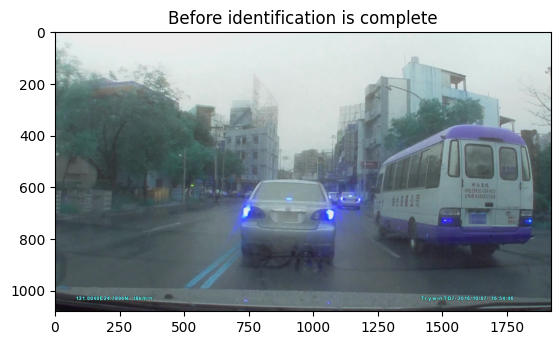

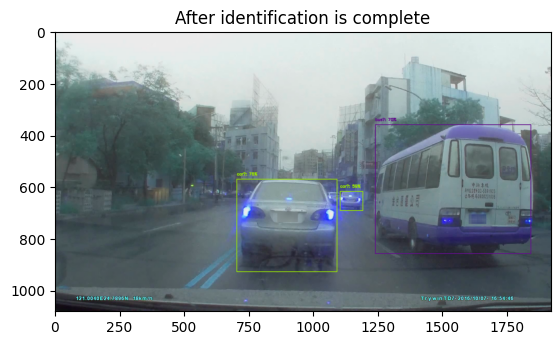

In [6]:
import os


import sys

import datetime
from PIL import Image
from IPython.display import display

import PIL

from PIL import ImageOps

import matplotlib.pyplot as plt
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Activation, ReLU
from tensorflow.keras.layers import BatchNormalization, Conv2DTranspose, Concatenate
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf
import numpy as np

import os
import tarfile

from matplotlib import gridspec
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import urllib
from IPython.display import clear_output
import matplotlib.pyplot as plt
import matplotlib.image
image_url = 'https://github.com/max106051231/tensorflow_object_detection_car/blob/main/test_image/car.png?raw=true'

filenames = image_url.split("/")


url_response = urllib.request.urlopen(image_url)
img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
img = cv.imdecode(img_array, cv.IMREAD_COLOR)
#print(filenames)
num_classes = 6
batch_size = 10
img_size = (160, 160)


image_list = "/content/drive/MyDrive/submission_end/Public_Testing_Dataset_Only_for_detection"
save_dir = "."

#print (image_list)
#print (save_dir)
from skimage import io

import shutil

#os.mkdir(save_dir+"/object_detections")
#os.mkdir(save_dir+"/segmentation")
#model = tf.keras.models.load_model('tensorflow_model')
import zipfile

import pathlib
import glob
import pandas as pd

filename = []
filesc = []
fileclass = []
filex = []
filey = []
filew = []
fileh = []
img_height = 180
img_width = 180
batch_size = 32
j = 0
submit2=pd.DataFrame()
y = 0


DETECTION_THRESHOLD = 0.3
import time
import numpy as np

import urllib.request

# Update the URL to point to the raw file on GitHub
model_path = 'https://github.com/max106051231/tensorflow_object_detection_car/raw/main/tflite_model/model2.tflite'
model_path = urllib.request.urlretrieve(model_path,"model2.tflite")
# Load the labels into a list
classes = ['???'] * 1000
label_map = 'https://raw.githubusercontent.com/max106051231/tensorflow_object_detection_car/refs/heads/main/labelmap/labelmap.txt'
label_map = urllib.request.urlretrieve(label_map,"labelmap.txt")
label_map = open("labelmap.txt",'r')
label_line = label_map.readlines()
t = 0
for label_name in label_line:
    classes[t] = label_name
    t = t+1
# Define a list of colors for visualization
COLORS = np.random.randint(0, 255, size=(len(classes), 3), dtype=np.uint8)

def preprocess_image(image_path, input_size):
  """Preprocess the input image to feed to the TFLite model"""
  img = tf.io.read_file(image_path)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, np.float32)
  original_image = img
  resized_img = tf.image.resize(img, input_size)
  resized_img = resized_img[tf.newaxis, :]
  resized_img = tf.cast(resized_img, dtype=np.float32)
  return resized_img, original_image

def detect_objects(interpreter, image, threshold):
  """Returns a list of detection results, each a dictionary of object info."""

  signature_fn = interpreter.get_signature_runner()

  # Feed the input image to the model
  output = signature_fn(input=image)

  # Get all outputs from the model
  count = int(np.squeeze(output['output_0']))
  scores = np.squeeze(output['output_1'])
  classes = np.squeeze(output['output_2'])
  boxes = np.squeeze(output['output_3'])

  results = []
  for i in range(count):
    if scores[i] >= threshold:
      result = {
        'bounding_box': boxes[i],
        'class_id': classes[i],
        'score': scores[i]
      }
      results.append(result)
  return results

def run_odt_and_draw_results(image_path, interpreter, threshold=0.5):
  """Run object detection on the input image and draw the detection results"""
  # Load the input shape required by the model
  _, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']

  # Load the input image and preprocess it
  preprocessed_image, original_image = preprocess_image(
      image_path,
      (input_height, input_width)
    )

  # Run object detection on the input image
  results = detect_objects(interpreter, preprocessed_image, threshold=threshold)

  # Plot the detection results on the input image
  original_image_np = image_np
  for obj in results:
    # Convert the object bounding box from relative coordinates to absolute
    # coordinates based on the original image resolution
    ymin, xmin, ymax, xmax = obj['bounding_box']
    xmin = int(xmin * original_image_np.shape[1])
    xmax = int(xmax * original_image_np.shape[1])
    ymin = int(ymin * original_image_np.shape[0])
    ymax = int(ymax * original_image_np.shape[0])
    filex.append(int(xmin))
    filey.append(int(ymin))
    fileh.append(int(ymax-ymin))
    filew.append(int(xmax-xmin))
    filename.append(line)
    # Find the class index of the current object
    class_id = int(obj['class_id'])
    #print(class_id)
    if(class_id == 0):
        fileclass.append(2)
    elif(class_id == 1):
        fileclass.append(4)
    elif(class_id == 3):
        fileclass.append(3)
    elif(class_id == 7):
        fileclass.append(1)
    elif(class_id == 5):
        fileclass.append(1)
    elif(class_id == 2):
        fileclass.append(1)
    else:
        fileclass.append('x')
    filesc.append(obj['score'])
    # Draw the bounding box and label on the image
    color = [int(c) for c in COLORS[class_id]]
    cv.rectangle(original_image_np, (xmin, ymin), (xmax, ymax), color, 2)
    # Make adjustments to make the label visible for all objects
    y = ymin - 15 if ymin - 15 > 15 else ymin + 15
    label = "{}: {:.0f}%".format(classes[class_id], obj['score'] * 100)
    cv.putText(original_image_np, label, (xmin, y),
        cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

  # Return the final image
  original_uint8 = original_image_np.astype(np.uint8)
  return original_uint8


#model_path2 = 'model.tflite/model_only.tflite'


def preprocess_image(image_path, input_size):
  """Preprocess the input image to feed to the TFLite model"""
  img = tf.io.read_file(image_path)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, np.float32)
  original_image = img
  resized_img = tf.image.resize(img, input_size)
  resized_img = resized_img[tf.newaxis, :]
  resized_img = tf.cast(resized_img, dtype=np.float32)
  return resized_img, original_image

i=0
for line in filenames[-1]:
    #try:
        i = i+1
        image_np = img
        images = line.split(".")[0]
        image_n = cv.resize(image_np[:,:,::-1],(160,160))
        plt.imshow(image_np)
        cv.imwrite(filenames[-1].split("?")[0],image_np)
        plt.title("Before identification is complete")
        plt.show()
        image_n = np.expand_dims(image_n,axis=0)


        #val_preds = model.predict(image_n)
        #mask = np.argmax(val_preds[0], axis=-1)
        #print(val_preds)
        #mask = np.expand_dims(mask, axis=-1)
        #cv.imencode(".png",mask.astype(np.int32))[1].tofile(save_dir+"/segmentation/"+images[0]+'.png')
        #img = cv.imread(save_dir+"/segmentation/"+images[0]+'.png',-1)
        #img = cv.resize(img, (1920, 1080),cv.INTER_CUBIC)

        #print(*np.array(img))
        #cv.imwrite(save_dir+"/segmentation/"+images[0]+'.png',img)


        new_img = cv.resize(image_np, (512, 512),cv.INTER_CUBIC)
        new_img_1 = new_img
        DETECTION_THRESHOLD = 0.3

        interpreter = tf.lite.Interpreter(model_path="model2.tflite")
        interpreter.allocate_tensors()
        signatures = interpreter.get_signature_list()
        #print(signatures)

        input_details = interpreter.get_input_details()
        output_details = interpreter.get_output_details()
        #print('INPUT\n', input_details)
        #print('\n OUTPUT\n',output_details)

        detection_result_image = run_odt_and_draw_results(
                filenames[-1].split("?")[0],
                interpreter,
                threshold=DETECTION_THRESHOLD
        )
        cv.imwrite(save_dir+"/object_detections/"+images[0]+'.png',detection_result_image)
        detection_result_image = cv.resize(detection_result_image, (1920, 1080),cv.INTER_CUBIC)
        plt.imshow(detection_result_image)
        plt.title("After identification is complete")
        plt.show()
        if(i >= 1):
          break
    #except:
        y = y+1
        #print("error")
submit2.insert(0,column="confidence",value=filesc)
submit2.insert(0,column="h",value=fileh)
submit2.insert(0,column="w",value=filew)
submit2.insert(0,column="y",value=filey)
submit2.insert(0,column="x",value=filex)
submit2.insert(0,column="label_id",value=fileclass)
submit2.insert(0,column="image_filename",value=filename)

#submit2.to_csv(save_dir+"/object_detections/submission.csv",index=False)
os.chdir(save_dir)
#with zipfile.ZipFile('submission.zip', mode='w') as zf:
    # 將要壓縮的檔案加入
    #zf.write("object_detections/submission.csv")
#    for root, dirs, files in os.walk("segmentation"):
#        for file_name in files:
#            zf.write(os.path.join(root, file_name))
#shutil.rmtree("object_detections")
#shutil.rmtree("segmentation")